In [9]:
import pandas as pd

# === 1. Cargar datos ===
df = pd.read_csv('/root/UA/Tarea_2/antofagasta_dirty.csv')

# === 2. Crear columna Datetime, ignorando el año original ===
df['Datetime'] = pd.to_datetime({
    'year': [2022]*len(df),
    'month': df['Month'],
    'day': df['Day'],
    'hour': df['Hour'],
    'minute': df['Minute']
})
df.set_index('Datetime', inplace=True)

# === 3. Crear un DatetimeIndex completo para todo el 2022 ===
datetime_full = pd.date_range(start='2022-01-01 00:00', end='2022-12-31 23:00', freq='H')

# === 4. Reindexar para forzar 8760 horas ===
df = df.reindex(datetime_full)

# === 5. Limpieza de irradiancias (Negativos y Outliers Estadísticos) ===
irradiance_columns = ['DNI', 'DHI', 'GHI']

for col in irradiance_columns:
    # 5.1 Eliminar negativos
    df[col] = df[col].apply(lambda x: x if (x is None or x >= 0) else None)

    # 5.2 Detectar outliers estadísticamente
    mean = df[col].mean()
    std = df[col].std()
    upper_limit = mean + 3*std  # Definimos outlier como mayor a media + 3 desviaciones estándar

    # 5.3 Reemplazar outliers por NaN
    df[col] = df[col].apply(lambda x: x if (x is None or x <= upper_limit) else None)

# === 6. Interpolación de valores faltantes ===
df.interpolate(method='linear', inplace=True)

# === 7. Confirmar cantidad final de filas ===
print(f"Cantidad de filas en el archivo limpio: {len(df)}")  # Debería ser 8760

# === 8. Guardar archivo limpio ===
df.to_csv('antofagasta_clean_8760_v2.csv')
print("Archivo limpio y completo guardado como 'antofagasta_clean_8760_v2.csv'")


Cantidad de filas en el archivo limpio: 8760
Archivo limpio y completo guardado como 'antofagasta_clean_8760_v2.csv'


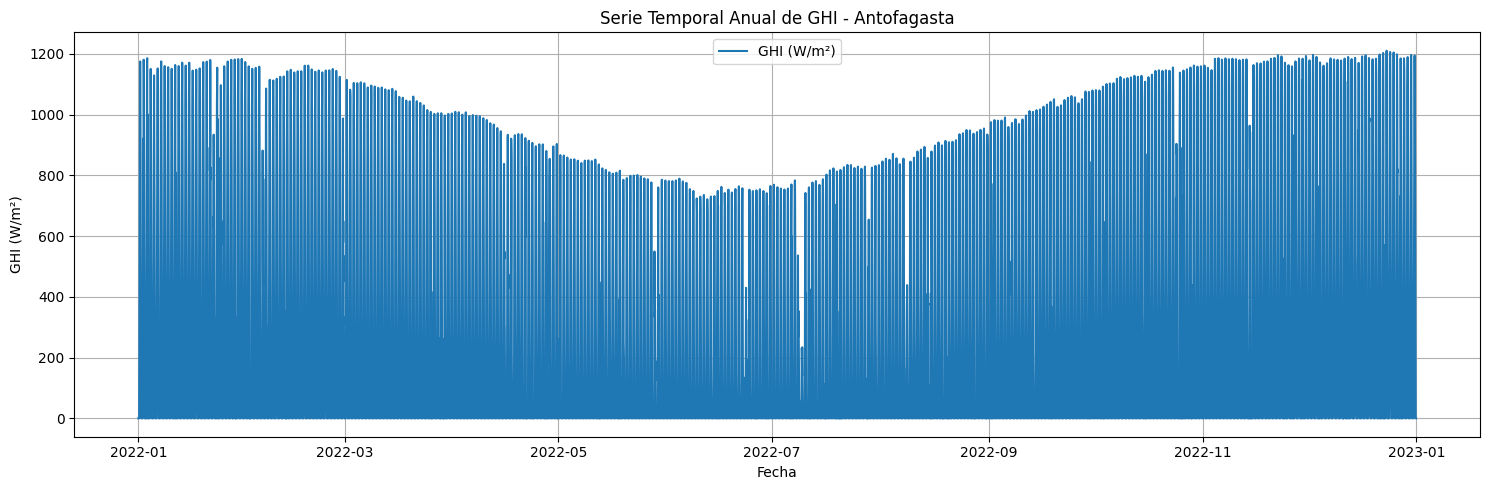

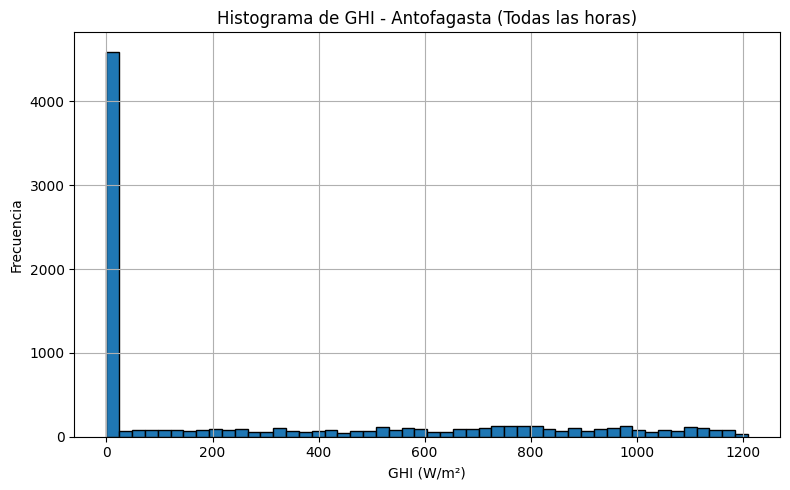

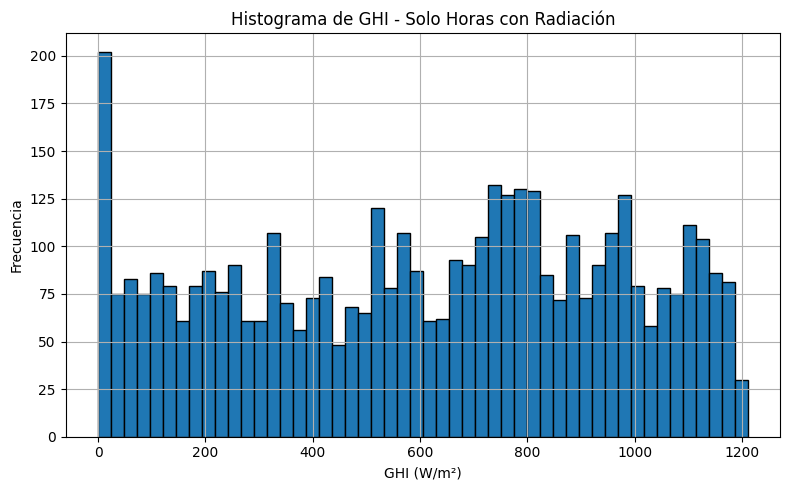

=== Matriz de Correlación ===
                    Year         Month           Day          Hour  Minute  \
Year        1.000000e+00  6.163004e-01  2.480277e-02 -1.095065e-15     NaN   
Month       6.163004e-01  1.000000e+00  1.189318e-02  2.566894e-15     NaN   
Day         2.480277e-02  1.189318e-02  1.000000e+00  1.665158e-16     NaN   
Hour       -1.095065e-15  2.566894e-15  1.665158e-16  1.000000e+00     NaN   
Minute               NaN           NaN           NaN           NaN     NaN   
GHI         2.497918e-02  2.916814e-02 -5.229914e-03  1.271410e-01     NaN   
DNI         1.925520e-02  2.567917e-02 -7.042872e-03  1.524413e-01     NaN   
DHI         2.666671e-03 -2.817492e-02  1.029578e-02  6.864067e-02     NaN   
Tdry        5.448793e-02  2.166283e-02 -3.216271e-02  1.407072e-01     NaN   
Tdew        6.048042e-02  2.609095e-02 -2.786600e-02  1.993182e-01     NaN   
RH         -2.577890e-01 -3.046928e-01 -5.855149e-03 -4.565914e-01     NaN   
Pres        7.336980e-02  3.784327

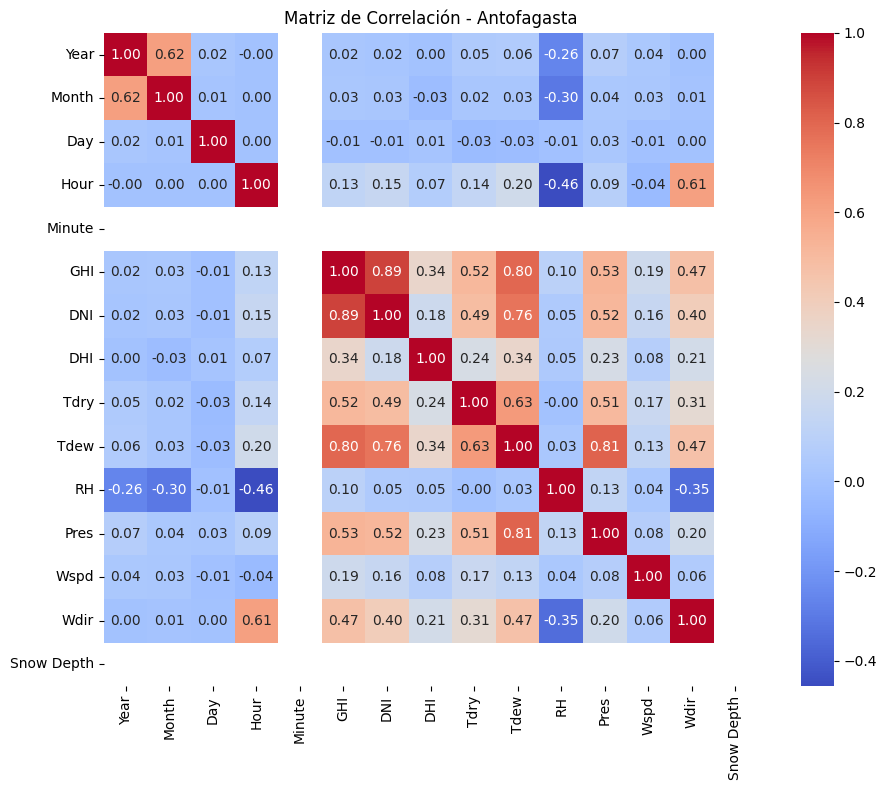

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar el archivo limpio correctamente ===
df = pd.read_csv('/root/UA/Tarea_2/antofagasta_clean_8760_v2.csv')
df['Datetime'] = pd.date_range(start='2022-01-01 00:00', periods=len(df), freq='H')
df.set_index('Datetime', inplace=True)

# Definir carpeta donde guardar
save_folder = '/root/UA/Tarea_2/'

# -----------------------------------
# 1. SERIE TEMPORAL ANUAL DE GHI
# -----------------------------------
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['GHI'], label='GHI (W/m²)')
plt.xlabel('Fecha')
plt.ylabel('GHI (W/m²)')
plt.title('Serie Temporal Anual de GHI - Antofagasta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(save_folder + 'serie_anual_GHI.png')  # <<<--- GUARDAR
plt.show()

# -----------------------------------
# 2. HISTOGRAMA DE GHI
# -----------------------------------
plt.figure(figsize=(8, 5))
plt.hist(df['GHI'], bins=50, edgecolor='black')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de GHI - Antofagasta (Todas las horas)')
plt.grid(True)
plt.tight_layout()
plt.savefig(save_folder + 'histograma_GHI_todas_horas.png')  # <<<--- GUARDAR
plt.show()

# (Opcional: Histograma solo cuando GHI > 0)
plt.figure(figsize=(8, 5))
plt.hist(df[df['GHI'] > 0]['GHI'], bins=50, edgecolor='black')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de GHI - Solo Horas con Radiación')
plt.grid(True)
plt.tight_layout()
plt.savefig(save_folder + 'histograma_GHI_horas_con_radiacion.png')  # <<<--- GUARDAR
plt.show()

# -----------------------------------
# === 3. MATRIZ DE CORRELACIÓN (TABLA Y HEATMAP) ===

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Cálculo de la matriz de correlación
corr_matrix = df_numeric.corr()

# Mostrar la matriz en consola
print("=== Matriz de Correlación ===")
print(corr_matrix)

# Gráfico Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Antofagasta')
plt.tight_layout()
plt.savefig(save_folder + 'matriz_correlacion.png')  # <<<--- GUARDAR
plt.show()
